In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score,recall_score

In [2]:
df = pd.read_csv('sms_spam.csv')
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [53]:
features = ['free', 'click', 'winner', 'money', 'buy', 'cash', 'offer', 'urgent', 'instant', 'bonus', 'no', 'instant', 
            'gift', 'purchase', 'believe', 'while', 'supplies', 'last', 'cost', 'fees', 'big', 'only', 'order', 
           'expires', 'win', 'award', 'receive', 'save', 'easy', 'prize']

In [44]:
df.columns

Index(['type', 'text', 'free', 'click', 'winner', 'money', 'buy', 'cash',
       'now', 'offer', 'urgent', 'instant', 'bonus', 'no', 'gift', 'purchase',
       'believe', 'while', 'supplies', 'last', 'cost', 'fees', 'big', 'only',
       'order', 'expires', 'win', 'award', 'receive', 'save', 'easy', 'prize'],
      dtype='object')

In [45]:
df['text'] = df.text.str.lower()

In [54]:
for i in features:
    df[i] = df.text.str.contains(i)

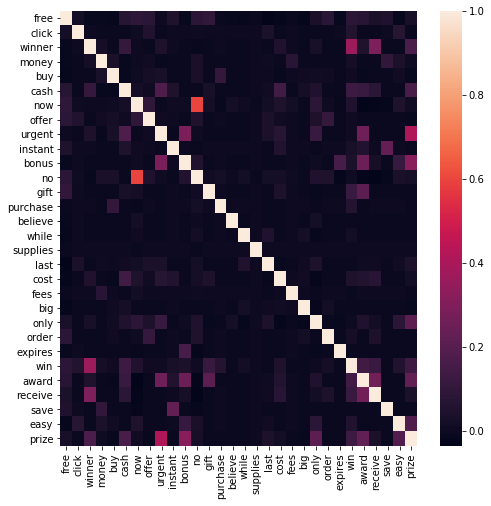

In [55]:
plt.figure(figsize = [8,8])
sns.heatmap(df.corr())

In [48]:
X = df[features]
y =df.type

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4169, 30), (4169,), (1390, 30), (1390,))

In [28]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)

0.9223021582733812

In [29]:
y_pred = bnb.predict(X)

In [30]:
print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (y != y_pred).sum()
))

Number of mislabeled points out of a total 5559 points : 428


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
bnb.fit(X_train,y_train)
y_pred_class = bnb.predict(X_test)
print("Classification Accuracy (Percentage of Correct Predictions): {:.2%}.".format(metrics.accuracy_score(y_test,y_pred_class)))

Classification Accuracy (Percentage of Correct Predictions): 92.23%.


In [35]:
cross_val_score(bnb, X, y, cv=10)

array([0.92639138, 0.92818671, 0.92266187, 0.91906475, 0.92805755,
       0.92086331, 0.90827338, 0.93693694, 0.90990991, 0.91351351])

In [42]:
confusion_matrix(y_test, bnb.predict(X_test))

array([[1187,   19],
       [  89,   95]], dtype=int64)

I decided to drop a few features based on my heat map in order raise the accuracy percentage of my spam fiter. At this point, I have a 92% accuracy percentage which I think is pretty good but can still be improved upon. I was not sure how to implement cross validation, but I decided to check the score to see if different iterations would give me the same accuracy. I think what could help in improving this spam filter would be to analyze which features are not repreated as much as others and drop those from 'features'.